<span style ="color:red">
    <h2>TP3 mini projet integration numerique
    </h2></span>

<span style ="color:orange">
    <h2> methode rectangle
 </h2></span>
 
Cette méthode consiste à remplacer l'intégrale par une somme de Riemann obtenue en prenant une subdivision arithmétique pointée de raison **(b-a)/n**, le point choisi étant le milieu de chaque sous-intervalle. 
Voici une appliquette illustrant ce principe:

<span style ="color:indigo">
  <h2>
      - principe
    </h2></span>

Sur chaque intervalle, on réalise ainsi l’approximation suivante :

 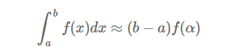
                     


où α est une abscisse appartenant à l’intervalle limité par a et b.

Nous nous limiterons ici aux cas où α=a ou b, ce qui signifie que pour chaque intervalle nous considérons comme constante la valeur prise par la fonction à l’extrémité gauche ou droite de l’intervalle.

Comme exemple, nous allons réaliser un programme d’intégration pour α=a et nous visualiserons les rectangles.

**Pour tracer un rectangle ABCD (voir figure ci-dessous), il suffit de faire un plot avec les coordonnées de A, B, C, D et A. On termine par A pour fermer le tracé.**

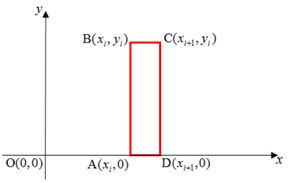

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class RectangleG ( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=sum(y[0:-1])
        return h*s
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"r")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_rectangle_gauche")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        #print(' itegrale approché par méthode des rectangle :I_{} ={:0.4f} '.format( self.n,self.integrate(f)))

In [124]:
f=lambda x:1/(x**2+1)
R=RectangleG(-1,1,5,f)
print(R)

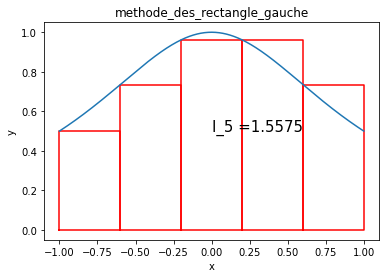

In [105]:
R.Graph(f)

In [106]:
from ipywidgets import interact,interactive,fixed,interact_manual,widgets

In [107]:
def simulation(a,b,n,f):
    R=RectangleG(a,b,n,f)
    return R.Graph(f)

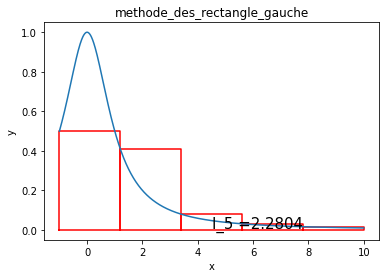

In [108]:
simulation(-1,10,5,f)

## calcul

In [109]:
# -*- coding: utf-8 -*-
# python version 3.4 
import math 
 
 
def rectangles(a, b, n, f): 
    """méthode d'approximation dite 'des rectangles'""" 
    S = 0 
    for i in range(0, n): 
        x1 = a + (b - a) * i / float(n) 
        x2 = a + (b - a) * (i + 1) / float(n) 
        S += f((x1 + x2) / 2.0) * (x2 - x1) 
    return S 
 
 
def fonc(x): 
    return 4.0 / (1 + (x - 3) * (x - 3))
rectangles(0,1,100,f)

0.7854002467307813

<span style ="color:orange">
    <h2> methode Trapéze
 </h2></span>

La méthode de Simpson consiste à remplacer la fonction ff sur chaque intervalle par une fonction qui sera un trinôme. En effet, nous allons l’approcher par un polynôme de degré 2 qui passe pas les points

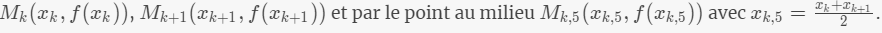

Sur chaque intervalle, on réalise alors l’approximation suivante :



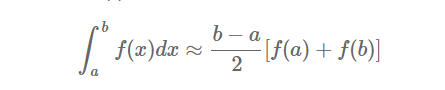

<span style ="color:indigo">
  <h2>
      - principe
    </h2></span>

Justification de la formule :

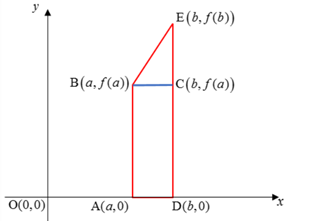

Pour calculer la surface du trapèze ABED, on fait la somme des aires du rectangle ABCD et du triangle rectangle BEC.


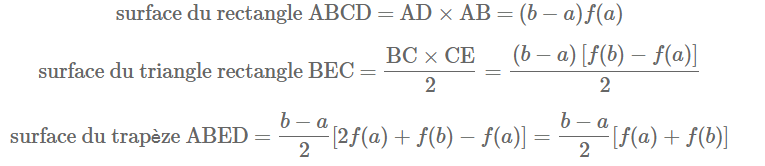

## code trapeze

In [113]:
#methode trapezoide
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class Trapezoidal( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=y[0]+y[-1]+2.0*sum(y[1:-1])
        return h*s/2.0
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i+1 ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"m")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl,yl,"cs")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_trapezes")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        

In [114]:
def simultrap(n,f):
    T=Trapezoidal(1,-1,n,f)
    return T.Graph(f)

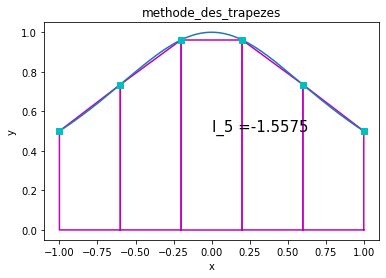

In [115]:
simultrap(5,f)

## calcul trapeze

In [116]:
# -*- coding: utf-8 -*-
# python version 3.4 
import math 
 
 
def trapezes(a, b, n, f): 
    """méthode d'approximation dite 'des trapèzes'""" 
    S = 0 
    for i in range(0, n): 
        x1 = a + (b - a) * i / float(n) 
        x2 = a + (b - a) * (i + 1) / float(n) 
        S += (f(x1) + f(x2)) / 2.0 * (x2 - x1) 
    return S 
 
 
def fonc(x): 
    return 4.0 / (1 + (x - 3) * (x - 3))

trapezes(0,1,10,f)

0.7849814972267898

<span style ="color:orange">
    <h2> methode simpson</h2></span>

Il existe de nombreuses méthodes pour réaliser une intégration numérique. Nous allons considérer la méthode de Simpson

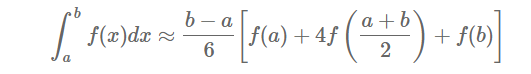


Pour obtenir la formule de Simpson, on va réaliser une interpolation avec **<span style ='color:hotpink'>un polynôme de degré 2</span>**. Un polynôme étant une fonction très facile à intégrer, on approche l’intégrale de la fonction f sur l’intervalle [a,b], par l’intégrale du polynôme sur ce même intervalle.

## Visualisation des polynômes de Lagrange

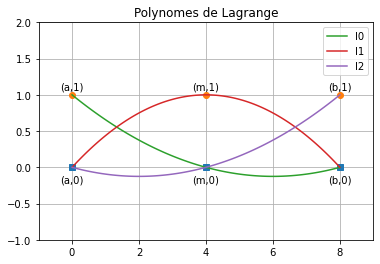

In [117]:
from pylab import *

a = 0
b = 8
m = (a+b)/2

x = linspace(a, b, 101)

l0 = (x-m)/(a-m)*(x-b)/(a-b)
l1 = (x-a)/(m-a)*(x-b)/(m-b)
l2 = (x-a)/(b-a)*(x-m)/(b-m)

plot([a,m,b],zeros(3),"s") # position des valeurs 0
plot([a,m,b],ones(3), "o")  # position des valeurs 1
plot(x,l0, label="l0")
plot(x,l1, label="l1")
plot(x,l2, label="l2")

title("Polynomes de Lagrange")
xlim(-1,9)
ylim(-1,2)
text(a,-0.1,"(a,0)",ha="center",va="top")
text(m,-0.1,"(m,0)",ha="center",va="top")
text(b,-0.1,"(b,0)",ha="center",va="top")
text(a,1.05,"(a,1)",ha="center",va="bottom")
text(m,1.05,"(m,1)",ha="center",va="bottom")
text(b,1.05,"(b,1)",ha="center",va="bottom")
legend()
grid()

show()

## code  simpson

In [118]:
#methode trapezoide
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class S( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(b-a)/n
        s=(f(a) + f(b)) / 2 + 2 * f(a + h / 2) 
        for i in range(1, n): # On calcule la somme 
            somme += f(x) + 2 * f(x + h / 2)
            x += h
        return h*s/3.0
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            xx = np. linspace ( xl [ i ] , xl [ i +1], resolution ) 
            m = int( xl [i]+xl[ i +1])/2 
            a = xl [ i ] 
            b = xl [ i+1] 
            l = (xx−m)/(a−m)∗(xx−b)/(a−b) 
            l1 = (xx−a)/(m−a)∗(xx−b)/(m−b) 
            l2 = (xx−a)/(b−a)∗(xx−m)/(b−m)
            P = f (a)∗l0 + f (m)∗l1 + f (b)∗l2 
            plt.plot (xx ,P, ’r ’) 
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl,yl,"cs")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_trapezes")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)    

SyntaxError: invalid character in identifier (<ipython-input-118-b325a8cd62ed>, line 32)

## calcul simpson

In [119]:

def simpson(f, a, b, n):
    pas = (b - a) / n
    somme = (f(a) + f(b)) / 2 + 2 * f(a + pas / 2)  # On initialise la somme
    x = a + pas           # La somme commence à x_1 
    for i in range(1, n): # On calcule la somme 
        somme += f(x) + 2 * f(x + pas / 2)
        x += pas
    return somme * pas / 3   # On retourne cette somme fois le pas / 3 
simpson(f,-1,1,10)

TypeError: f() takes at least 2 positional arguments (1 given)

## double interaction

In [120]:
# dans le memei interact 
def simulf(a,b,n,f):
    R=RectangleG(a,b,n,f)
    T=Trapezoidal(a,b,n,f)
    fig= plt.figure(figsize=(12,4))
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
    plt.show()

In [121]:




interact(simulf,
   a=widgets.IntSlider(min=0,max=50,step=1,value=10),
 b=widgets.IntSlider(min=0,max=50,step=1,value=10),
 n=widgets.IntSlider(min=0,max=100,step=5,value=10),
      f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)' :lambda x:sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5' :lambda x:x**2-x+5})



from ipywidgets import Button, GridBox, Layout, ButtonStyle
sidebar = Button(description='validate',
                 layout=Layout(width='auto', grid_area='validate') ,style=ButtonStyle(button_color='salmon'))


GridBox(
        layout=Layout(
            width='5%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "                          "
            "main main . sidebar "
        
            ''')
       )
sidebar

interactive(children=(IntSlider(value=10, description='a', max=50), IntSlider(value=10, description='b', max=5…

Button(description='validate', layout=Layout(grid_area='validate', width='auto'), style=ButtonStyle(button_col…

<span style ="color:orange">
    <h2> Example with insert textBox</h2></span>

TypeError: f() takes at least 2 positional arguments (1 given)

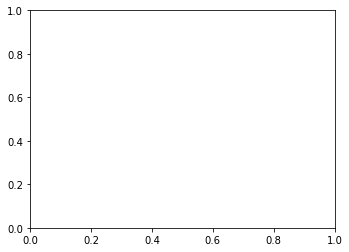

In [122]:
# dans le memei interact 
def simulf2(a,b,n,f):
    R=RectangleG(a,b,n,f)
    T=Trapezoidal(a,b,n,f)
    fig= plt.figure(figsize=(12,4))
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
    plt.show()
simulf2(1,2,3,f)    

Label(value='insert a ')

Text(value='')

Label(value='insert b')

Text(value='')

Label(value='insert n')

Text(value='')

Button(description='disp', style=ButtonStyle())

1 2 10


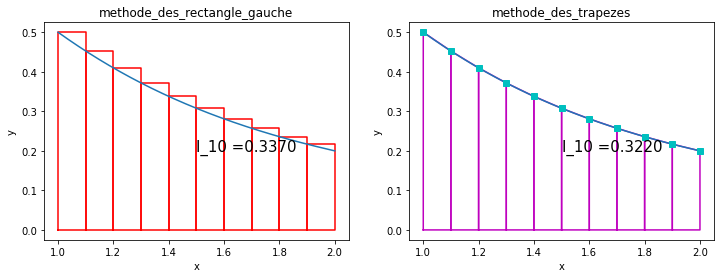

In [125]:
from ipywidgets import interact
import ipywidgets as widgets
lbl1=widgets.Label("insert a ")
display(lbl1)
text1=widgets.Text()
display(text1)

lbl2=widgets.Label("insert b")
display(lbl2)
text2=widgets.Text()
display(text2)
lbl3=widgets.Label("insert n")
display(lbl3)

text3=widgets.Text()
display(text3)


btn=widgets.Button(description="disp")
display(btn)
def disp(k):
    disabled=False
    a=int(text1.value)
    b=int(text2.value)
    n=int(text3.value)
    print(a,b,n)
    simulf(a,b,n,f)
    #interact(simulf,a,b,n=widgets.IntSlider(min=1,max=50,step=5,value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)' :lambda x:sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5' :lambda x:x**2-x+5})


btn.on_click(disp)


In [ ]:
#essayer afficher les solutioons 
f1=lambda x:cos(x)
f2=lambda x:sin(x)


In [24]:
def simpson(f,a,b):
  
    return (b-a)/6*(f(a)+4*f((a+b)/2)+f(b))

def int_adaptsimpson(f,a,b,tau):
    m=(a+b)/2
    Sab=simpson(f,a,b)
    Sam=simpson(f,a,m)
    Smb=simpson(f,m,b)
    if abs(Sab-Sam-Smb)/15<tau:
        return Sam+Smb+(Sam+Smb-Sab)/15
    else:
        return int_adaptsimpson(f,a,m,tau)+int_adaptsimpson(f,m,b,tau)
simpson(f,1,10)    

0.9568514851485148

In [20]:
# -*- coding: utf-8 -*-
# python version 3.4 
import math 
 
 
def simpson(a, b, n, f): 
    """méthode d'approximation de simpson""" 
    S = 0 
    for i in range(0, n): 
        x1 = a + (b - a) * i / float(n) 
        x2 = a + (b - a) * (i + 1) / float(n) 
        S += (f(x1) + 4 * f((x1 + x2) / 2.0) + f(x2)) * (x2 - x1) / 6.0 
    return S 
 
 
def fonc(x): 
    return 4.0 / (1 + (x - 3) * (x - 3)) 
 
 
def main(): 
    """Programme de tests""" 
    t = 4 * (math.atan(5) + math.atan(2)) 
    for i in range(10, 20): 
        s = simpson(1, 8, i, fonc) 
        print(s, t - s) 
 
 
if __name__ == '__main__': 
    main() 
 

9.921460503290515 0.0007374356659113346
9.92187595628941 0.0003219826670157744
9.92231896775922 -0.00012102880279307726
9.92218662622089 1.1312735535895513e-05
9.92214841452093 4.952443549655072e-05
9.922185152651913 1.2786304512957258e-05
9.922190371952347 7.567004079334083e-06
9.922187327975584 1.0610980842429285e-05
9.922189968661433 7.970294992887261e-06
9.922192215077411 5.72387901520699e-06
